<a href="https://colab.research.google.com/github/Pria91/Machine-Learning-Projects-/blob/main/MightyHive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Reading in the data file***

In [ ]:
import pandas as pd

df = pd.read_csv('/content/data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,8533875475515924645,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,4874599869430831185,2,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,361954421372951638,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,8751850432978942600,2,20170205,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,2451058030378352110,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392887,4823772839168317708,1,20170314,NaN,14,10.0,210.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Australia,Sydney
392888,4495028198726387872,1,20170314,NaN,15,13.0,306.0,NaN,NaN,m.facebook.com,Social,Android Webview,mobile,United States,not available in demo dataset
392889,659863211325608630,1,20170314,NaN,16,16.0,202.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Colombia,not available in demo dataset
392890,5989424100079269693,1,20170314,NaN,20,18.0,621.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Israel,Tel Aviv-Yafo


***Looking at some important numbers from data***

In [ ]:
df.describe()

,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions
count,392892.000000,3.928920e+05,195964.0,392892.000000,392856.000000,196399.000000,5277.000000,5277.000000
mean,2.361198,2.017037e+07,1.0,4.414065,3.771015,276.837127,162.838217,1.047754
std,10.158865,1.692571e+02,0.0,8.555069,6.414908,485.765241,898.877951,0.571294
min,1.000000,2.017010e+07,1.0,1.000000,1.000000,1.000000,2.200000,1.000000
25%,1.000000,2.017022e+07,1.0,1.000000,1.000000,33.000000,29.180000,1.000000
50%,1.000000,2.017033e+07,1.0,2.000000,1.000000,94.000000,53.950000,1.000000
75%,1.000000,2.017052e+07,1.0,4.000000,4.000000,287.000000,114.530000,1.000000
max,389.000000,2.017063e+07,1.0,500.000000,466.000000,12136.000000,47082.060000,25.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392892 entries, 0 to 392891
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fullVisitorID       392892 non-null  object 
 1   visitNumber         392892 non-null  int64  
 2   date                392892 non-null  int64  
 3   bounces             195964 non-null  float64
 4   hits                392892 non-null  int64  
 5   pageviews           392856 non-null  float64
 6   timeOnSite          196399 non-null  float64
 7   transactionRevenue  5277 non-null    float64
 8   transactions        5277 non-null    float64
 9   source              392892 non-null  object 
 10  channelGrouping     392892 non-null  object 
 11  browser             392892 non-null  object 
 12  deviceCategory      392892 non-null  object 
 13  country             392892 non-null  object 
 14  city                392892 non-null  object 
dtypes: float64(5), int64(3), object(7)

In [ ]:
df.isnull().sum()

fullVisitorID              0
visitNumber                0
date                       0
bounces               196928
hits                       0
pageviews                 36
timeOnSite            196493
transactionRevenue    387615
transactions          387615
source                     0
channelGrouping            0
browser                    0
deviceCategory             0
country                    0
city                       0
dtype: int64

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")


# Return the dataframe with missing information
        return mis_val_table_ren_columns


missing_values_table(df)

Your selected dataframe has 15 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
transactionRevenue,387615,98.7
transactions,387615,98.7
bounces,196928,50.1
timeOnSite,196493,50.0
pageviews,36,0.0


***As seen above, 5 colunmns out of 15 have ~ 50 % to 99 % missing values. One can deal with NULLs in multiple ways depending on the given question in hand.***

In [ ]:
#df = df.fillna(0)
#df = df.fillna(df.median())
#df = df.fillna(df.median())
#df1 = df.dropna()

***ASSUMPTION-1:Transaction Revenue is an important attribute in this case (in general scenarios, businesses want the transaction revenue be maximised*** 

***ASSUMPTION-2:Bounce = 1 is when bounced, and Bounce = 0 is not bounced***

In [ ]:
df = df.fillna({"bounces": 0})

In [ ]:
df.isnull().sum()

fullVisitorID              0
visitNumber                0
date                       0
bounces                    0
hits                       0
pageviews                 36
timeOnSite            196493
transactionRevenue    387615
transactions          387615
source                     0
channelGrouping            0
browser                    0
deviceCategory             0
country                    0
city                       0
dtype: int64

In [ ]:
df

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city
0,8533875475515924645,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney
1,4874599869430831185,2,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul
2,361954421372951638,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow
3,8751850432978942600,2,20170205,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset
4,2451058030378352110,1,20170205,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392887,4823772839168317708,1,20170314,0.0,14,10.0,210.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Australia,Sydney
392888,4495028198726387872,1,20170314,0.0,15,13.0,306.0,NaN,NaN,m.facebook.com,Social,Android Webview,mobile,United States,not available in demo dataset
392889,659863211325608630,1,20170314,0.0,16,16.0,202.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Colombia,not available in demo dataset
392890,5989424100079269693,1,20170314,0.0,20,18.0,621.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Israel,Tel Aviv-Yafo


In [ ]:
#df = df.dropna()
#df1 = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
#df1.isnull().sum()

fullVisitorID         0
visitNumber           0
date                  0
bounces               0
hits                  0
pageviews             0
timeOnSite            0
transactionRevenue    0
transactions          0
source                0
channelGrouping       0
browser               0
deviceCategory        0
country               0
city                  0
dtype: int64

In [ ]:
df1 = df

***Lets figure out how many people are visiting the website - % of unique visitors***

In [ ]:
df1.fullVisitorID.nunique()

324787

In [ ]:
print("Number of unique visitors in dataset : ",df1.fullVisitorID.nunique(), "/", df1.shape[0])

Number of unique visitors in dataset :  324787 / 392892


In [ ]:
number_visitors = df1.fullVisitorID.nunique()/ df1.shape[0]

percentage_visitors = number_visitors * 100

print(percentage_visitors)

82.66571984158496


In [ ]:
# This means ~ 83% of the visitors are unique/different that implies more diverse traffic and hence,
# roughly 17% is regular/dedicated traffic 

***After first-order exploring/cleaning of the dataset, lets do some exploratory data analysis and visualizations***

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
#df2[['browser', 'transactionRevenue', 'transactions']].isnull().sum()

browser                   0
transactionRevenue    17741
transactions          17741
dtype: int64

In [ ]:
df2 = df1.loc[df1['browser'] == 'Firefox']
df2[['browser', 'transactionRevenue', 'transactions']].agg(['mean', 'count', 'size'])

,browser,transactionRevenue,transactions
count,17834.0,93.000000,93.000000
size,17834.0,17834.000000,17834.000000
mean,NaN,1451.422043,1.139785


In [ ]:
df2 = df1.loc[df1['browser'] == 'Chrome']
df2[['browser', 'transactionRevenue', 'transactions']].agg(['mean', 'count', 'size'])

,browser,transactionRevenue,transactions
count,279456.0,4729.000000,4729.000000
size,279456.0,279456.000000,279456.000000
mean,NaN,145.748435,1.049693


In [ ]:
df2 = df1.loc[df1['browser'] == 'Safari']
df2[['browser', 'transactionRevenue', 'transactions']].agg(['mean', 'count', 'size'])

,browser,transactionRevenue,transactions
count,61638.0,367.000000,367.000000
size,61638.0,61638.000000,61638.000000
mean,NaN,75.652125,1.008174


***As given in the data set, there are multiple browsers being used by visitors, it will be interesting to explore how much traffic comes from where, in terms of contributing to transaction revenue***

***DEVICE BROWSER CATEGORY***

In [ ]:
import plotly.tools as tools
import plotly
import plotly.graph_objs as go
import plotly.offline as py 

In [ ]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y=cnt_srs.index[::-1],
        x=cnt_srs.values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [ ]:
# Device Browser
cnt_srs = df1.groupby('browser')['transactionRevenue'].agg(['count', 'size', 'mean'])  #size counts NaN, count doesnt!
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(50, 171, 96, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(50, 171, 96, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(50, 171, 96, 0.6)')


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=3, vertical_spacing=0.04, 
                          subplot_titles=["Count", "Non-zero Revenue Count", "Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Device Browser")


py.iplot(fig)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



***CONCLUSIONS: It can be concluded that even though a lot of traffic is coming from Chrome, maximum transcation revenue comes from Firefox browser. This "could" have possible implications in terms of targeted marketing for compatble with certain browser settings***

***TRAFFIC INFORMATION***

In [ ]:
# MEDIUM - Organic search, referral, paid search 

cnt_srs = df1.groupby('channelGrouping')['transactionRevenue'].agg(['size', 'count', 'mean'])       
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"], 'purple')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"], 'purple')
trace3 = horizontal_bar_chart(cnt_srs["mean"], 'purple')


# Creating two subplots

fig = tools.make_subplots(rows=1, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Count", "Non-zero Revenue Count", "Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=1500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Traffic Medium")
py.iplot(fig)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



***CONCLUSIONS - By looking at the above visualizations, it can be concluded that Display as a medium is bringing the most trafficRevenue, which in turn has implications for online marketing***

In [ ]:
# Source - Youtube, Facebook, Bing 

cnt_srs = df1.groupby('source')['transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'green')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'green')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Count", "Non-zero Revenue Count", "Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)

fig['layout'].update(height=1500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Traffic Source")
py.iplot(fig)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



***CONCLUSION - By looking at the above visulaization, it is indicated that even though Direct as a source has maximum number of counts, most revenue is generated from dfa as a source - Double Click for Advertisers. This implies that maximum traffic conversion comes from Google Marketing Platform. This can be optimized further for better results.***

***USER ACTIVITY INFORMATION***

In [ ]:
gdf = df1.groupby("fullVisitorID").agg({'hits': 'sum', 'pageviews': 'sum', 'transactionRevenue': 'sum'})
gdf['isPayingVisitor'] = gdf['transactionRevenue'] > 0

In [ ]:
import plotly.express as px
px.scatter(gdf, x='hits', facet_col='isPayingVisitor')

In [ ]:
px.scatter(gdf, x='pageviews', facet_col='isPayingVisitor')

***CONCLUSION - A similarity in hits & pageviews is seen, and the conersion to paying visitors is similar.People with higher number of hits turn into paying customers. Simlar trend holds for pageviews as well.***

In [ ]:
cnt_srs

,count,count of non-zero revenue,mean
source,,,
(direct),167390,3782,153.600468
google,141404,1265,106.790980
youtube.com,43860,8,30.352500
analytics.google.com,8887,0,NaN
Partners,7928,2,20.480000
...,...,...,...
search.1and1.com,1,0,NaN
images.google.lk,1,0,NaN
ad.doubleclick.net,1,0,NaN


***GEOGRAPHICAL INFORMATION***

In [ ]:
# Continent
cnt_srs = df1.groupby('country')['transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(58, 71, 80, 0.6)')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"].head(10), 'rgba(58, 71, 80, 0.6)')
trace3 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(58, 71, 80, 0.6)')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Count", "Non-zero Revenue Count", "Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)


fig['layout'].update(height=1500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Continent")
py.iplot(fig)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



***CONCLUSION - The above visualization revealed that US is bringing more counts in transaction revenue, Venezuela is bringing in most transcationrevenue***

In [ ]:
df1['country'].value_counts()

United States           5042
Canada                    80
Japan                     11
Taiwan                    11
Venezuela                  9
Mexico                     8
Australia                  7
Singapore                  6
Brazil                     6
India                      5
Puerto Rico                5
Belgium                    5
Switzerland                5
South Korea                5
Colombia                   5
Ireland                    4
Ukraine                    4
Germany                    4
Hong Kong                  4
United Arab Emirates       3
United Kingdom             3
Indonesia                  3
Russia                     3
Guatemala                  2
China                      2
Spain                      2
Kuwait                     2
Israel                     2
Poland                     2
Ecuador                    2
Saudi Arabia               2
Greece                     2
France                     2
Sweden                     2
Argentina     

In [ ]:
# Sub Continent
cnt_srs = df1.groupby('city')['transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(cnt_srs["count"], 'orange')
trace2 = horizontal_bar_chart(cnt_srs["count of non-zero revenue"], 'orange')
trace3 = horizontal_bar_chart(cnt_srs["mean"], 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=3, vertical_spacing=0.08, horizontal_spacing=0.15, 
                          subplot_titles=["Count", "Non-zero Revenue Count", "Mean Revenue"])

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)



fig['layout'].update(height=1500, width=1200, paper_bgcolor='rgb(233,233,233)', title="Sub Continent")
py.iplot(fig)

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
    df["weekday"] = df['date'].dt.weekday #extracting week day
    df["day"] = df['date'].dt.day # extracting day
    df["month"] = df['date'].dt.month # extracting day
    df["year"] = df['date'].dt.year # extracting day
    #df['visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    
    return df

df = date_process(df1)

In [ ]:
df1

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city,weekday,day,month,year
0,8533875475515924645,1,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney,6,5,2,2017
1,4874599869430831185,2,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul,6,5,2,2017
2,361954421372951638,1,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow,6,5,2,2017
3,8751850432978942600,2,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset,6,5,2,2017
4,2451058030378352110,1,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset,6,5,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392887,4823772839168317708,1,2017-03-14,0.0,14,10.0,210.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Australia,Sydney,1,14,3,2017
392888,4495028198726387872,1,2017-03-14,0.0,15,13.0,306.0,NaN,NaN,m.facebook.com,Social,Android Webview,mobile,United States,not available in demo dataset,1,14,3,2017
392889,659863211325608630,1,2017-03-14,0.0,16,16.0,202.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Colombia,not available in demo dataset,1,14,3,2017
392890,5989424100079269693,1,2017-03-14,0.0,20,18.0,621.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Israel,Tel Aviv-Yafo,1,14,3,2017


In [ ]:
#df.plot(x ='fullVisitorID', y='visitNumber', kind = 'line')	
#df.plot(x ='timeOnSite', y='transactionRevenue', kind = 'scatter')	

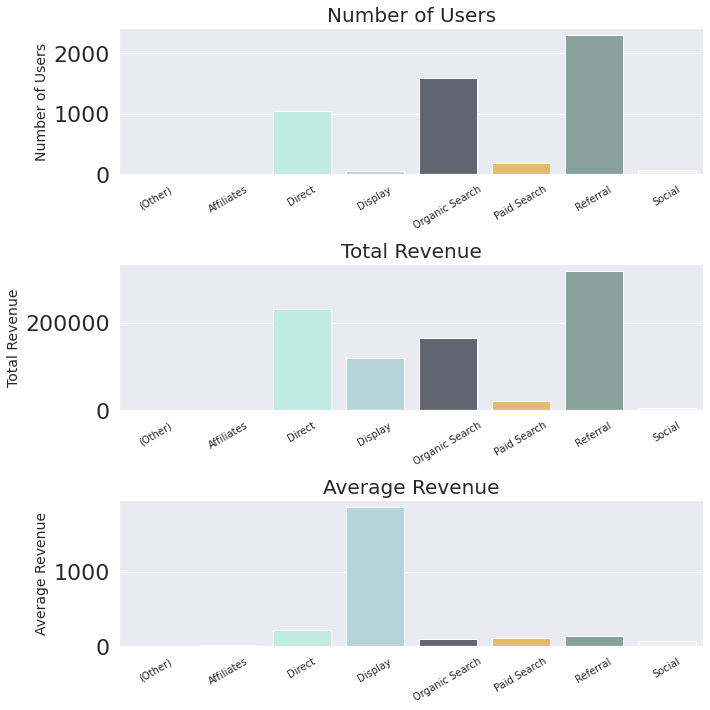

In [ ]:
group = df1.groupby('channelGrouping')['transactionRevenue'].agg(['count','sum','mean']).reset_index()

color = ["#ffa69e","#faf3dd","#b8f2e6","#aed9e0","#5e6472",'#f6bd60','#84a59d','#f8edeb']
customPalette = sns.set_palette(sns.color_palette(color))

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(311)
_ = sns.barplot(data=group, x='channelGrouping', y='count', palette= customPalette, ax=ax1)
xlabels = group['channelGrouping'].to_list()
ylabels = group['count']
_ = ax1.set_title('Number of Users', fontsize=20)
_ = ax1.set_ylabel('Number of Users', fontsize=14)
_ = ax1.set_xlabel('')
_ = ax1.set_xticklabels(xlabels, rotation=30, fontsize=10)


ax2 = fig.add_subplot(312)
_ = sns.barplot(data=group, x='channelGrouping', y='sum', palette= customPalette, ax=ax2)
xlabels = group['channelGrouping'].to_list()
ylabels = group['sum']
_ = ax2.set_title('Total Revenue', fontsize=20)
_ = ax2.set_ylabel('Total Revenue', fontsize=14)
_ = ax2.set_xlabel('')
_ = ax2.set_xticklabels(xlabels, rotation=30, fontsize=10)

ax3 = fig.add_subplot(313)
_ = sns.barplot(data=group, x='channelGrouping', y='mean', palette= customPalette, ax=ax3)
xlabels = group['channelGrouping'].to_list()
ylabels = group['mean']
_ = ax3.set_title('Average Revenue', fontsize=20)
_ = ax3.set_ylabel('Average Revenue', fontsize=14)
_ = ax3.set_xlabel('')
_ = ax3.set_xticklabels(xlabels, rotation=30, fontsize=10)

fig.tight_layout(pad=0.5)

In [ ]:
df1

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city,weekday,day,month,year
0,8533875475515924645,1,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Australia,Sydney,6,5,2,2017
1,4874599869430831185,2,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,mobile,Turkey,Istanbul,6,5,2,2017
2,361954421372951638,1,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Russia,Moscow,6,5,2,2017
3,8751850432978942600,2,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,bing,Organic Search,Edge,desktop,United States,not available in demo dataset,6,5,2,2017
4,2451058030378352110,1,2017-02-05,1.0,1,1.0,NaN,NaN,NaN,(direct),Organic Search,Chrome,desktop,Indonesia,not available in demo dataset,6,5,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392887,4823772839168317708,1,2017-03-14,0.0,14,10.0,210.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Australia,Sydney,1,14,3,2017
392888,4495028198726387872,1,2017-03-14,0.0,15,13.0,306.0,NaN,NaN,m.facebook.com,Social,Android Webview,mobile,United States,not available in demo dataset,1,14,3,2017
392889,659863211325608630,1,2017-03-14,0.0,16,16.0,202.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Colombia,not available in demo dataset,1,14,3,2017
392890,5989424100079269693,1,2017-03-14,0.0,20,18.0,621.0,NaN,NaN,youtube.com,Social,Chrome,desktop,Israel,Tel Aviv-Yafo,1,14,3,2017


In [ ]:
df3 = df1.loc[df1['year'] == 2017]
df3 = df1.loc[df1['month'] == 2]

#df2[['browser', 'transactionRevenue', 'transactions']].agg(['mean', 'count', 'size'])

***After some EDA, we have gained insight into data through numbers & visualizations***

***Lets deal with NULLs***

In [ ]:
# *************** REPLACING NUMERICAL NULLS WITH MEAN OF THE RESPECTIVE COLUMN 
#df = df.fillna(df.mean())

# *************** REPLACING NUMERICAL NULLS WITH MEDIAN OF THE RESPECTIVE COLUMN 
#df = df.fillna(df.median())

# *************** DROPPING NUMERICAL NULLS FROM EVERY COLUMN 
df3 = df1.dropna()

In [ ]:
df3

,fullVisitorID,visitNumber,date,bounces,hits,pageviews,timeOnSite,transactionRevenue,transactions,source,channelGrouping,browser,deviceCategory,country,city,weekday,day,month,year
1083,770343271394368802,4,2017-02-05,0.0,10,9.0,538.0,21.99,1.0,mail.google.com,Referral,Chrome,desktop,United States,Houston,6,5,2,2017
1135,379075858210159530,5,2017-02-05,0.0,14,14.0,507.0,75.78,1.0,(direct),Referral,Chrome,desktop,United States,not available in demo dataset,6,5,2,2017
1155,7355682969727116264,1,2017-02-05,0.0,18,15.0,590.0,5.50,1.0,(direct),Organic Search,Chrome,desktop,United States,not available in demo dataset,6,5,2,2017
1164,6976087133861419230,1,2017-02-05,0.0,19,15.0,169.0,63.99,1.0,(direct),Direct,Chrome,mobile,United States,Houston,6,5,2,2017
1169,5513418547926815153,1,2017-02-05,0.0,20,17.0,450.0,63.97,1.0,(direct),Organic Search,Chrome,desktop,United States,not available in demo dataset,6,5,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392489,7428770824061226835,2,2017-03-14,0.0,47,37.0,1415.0,85.08,1.0,google,Organic Search,Chrome,desktop,United States,New York,1,14,3,2017
392492,238046754537073811,5,2017-03-14,0.0,53,44.0,1490.0,41.38,2.0,(direct),Referral,Chrome,desktop,Singapore,(not set),1,14,3,2017
392493,6481826553223579425,5,2017-03-14,0.0,57,45.0,799.0,236.99,1.0,(direct),Referral,Chrome,desktop,United States,New York,1,14,3,2017
392496,6957245643416321514,1,2017-03-14,0.0,179,132.0,12136.0,96.95,1.0,google,Organic Search,Edge,desktop,United States,not available in demo dataset,1,14,3,2017


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5276 entries, 1083 to 392891
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   fullVisitorID       5276 non-null   object        
 1   visitNumber         5276 non-null   int64         
 2   date                5276 non-null   datetime64[ns]
 3   bounces             5276 non-null   float64       
 4   hits                5276 non-null   int64         
 5   pageviews           5276 non-null   float64       
 6   timeOnSite          5276 non-null   float64       
 7   transactionRevenue  5276 non-null   float64       
 8   transactions        5276 non-null   float64       
 9   source              5276 non-null   object        
 10  channelGrouping     5276 non-null   object        
 11  browser             5276 non-null   object        
 12  deviceCategory      5276 non-null   object        
 13  country             5276 non-null   object 

***As seen above, different data types present in this data set are - int, float, and object***

In [ ]:
int_df = df3.select_dtypes(include=['int64']).copy()
float_df = df3.select_dtypes(include=['float64']).copy()
obj_df = df3.select_dtypes(include=['object']).copy()

In [ ]:
obj_df

,fullVisitorID,source,channelGrouping,browser,deviceCategory,country,city
1083,770343271394368802,mail.google.com,Referral,Chrome,desktop,United States,Houston
1135,379075858210159530,(direct),Referral,Chrome,desktop,United States,not available in demo dataset
1155,7355682969727116264,(direct),Organic Search,Chrome,desktop,United States,not available in demo dataset
1164,6976087133861419230,(direct),Direct,Chrome,mobile,United States,Houston
1169,5513418547926815153,(direct),Organic Search,Chrome,desktop,United States,not available in demo dataset
...,...,...,...,...,...,...,...
392489,7428770824061226835,google,Organic Search,Chrome,desktop,United States,New York
392492,238046754537073811,(direct),Referral,Chrome,desktop,Singapore,(not set)
392493,6481826553223579425,(direct),Referral,Chrome,desktop,United States,New York
392496,6957245643416321514,google,Organic Search,Edge,desktop,United States,not available in demo dataset


In [ ]:
obj_df["fullVisitorID"] = obj_df["fullVisitorID"].astype('category')
obj_df["source"] = obj_df["source"].astype('category')
obj_df["channelGrouping"] = obj_df["channelGrouping"].astype('category')
obj_df["browser"] = obj_df["browser"].astype('category')
obj_df["deviceCategory"] = obj_df["deviceCategory"].astype('category')
obj_df["country"] = obj_df["country"].astype('category')
obj_df["city"] = obj_df["city"].astype('category')



obj_df["fullVisitorID_cat"] = obj_df["fullVisitorID"].cat.codes
obj_df["source_cat"] = obj_df["source"].cat.codes
obj_df["channelGrouping_cat"] = obj_df["channelGrouping"].cat.codes
obj_df["browser_cat"] = obj_df["browser"].cat.codes
obj_df["deviceCategory_cat"] = obj_df["deviceCategory"].cat.codes
obj_df["country_cat"] = obj_df["country"].cat.codes
obj_df["city_cat"] = obj_df["city"].cat.codes

In [ ]:
obj_df

,fullVisitorID,source,channelGrouping,browser,deviceCategory,country,city,fullVisitorID_cat,source_cat,channelGrouping_cat,browser_cat,deviceCategory_cat,country_cat,city_cat
1083,770343271394368802,mail.google.com,Referral,Chrome,desktop,United States,Houston,516,17,6,1,0,47,33
1135,379075858210159530,(direct),Referral,Chrome,desktop,United States,not available in demo dataset,283,0,6,1,0,47,97
1155,7355682969727116264,(direct),Organic Search,Chrome,desktop,United States,not available in demo dataset,2483,0,4,1,0,47,97
1164,6976087133861419230,(direct),Direct,Chrome,mobile,United States,Houston,2360,0,2,1,1,47,33
1169,5513418547926815153,(direct),Organic Search,Chrome,desktop,United States,not available in demo dataset,1927,0,4,1,0,47,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392489,7428770824061226835,google,Organic Search,Chrome,desktop,United States,New York,2509,10,4,1,0,47,54
392492,238046754537073811,(direct),Referral,Chrome,desktop,Singapore,(not set),197,0,6,1,0,35,0
392493,6481826553223579425,(direct),Referral,Chrome,desktop,United States,New York,2216,0,6,1,0,47,54
392496,6957245643416321514,google,Organic Search,Edge,desktop,United States,not available in demo dataset,2356,10,4,2,0,47,97


In [ ]:
features = pd.concat([int_df, float_df, obj_df], axis = 1)

In [ ]:
features

,visitNumber,hits,weekday,day,month,year,bounces,pageviews,timeOnSite,transactionRevenue,transactions,fullVisitorID,source,channelGrouping,browser,deviceCategory,country,city,fullVisitorID_cat,source_cat,channelGrouping_cat,browser_cat,deviceCategory_cat,country_cat,city_cat
1083,4,10,6,5,2,2017,0.0,9.0,538.0,21.99,1.0,770343271394368802,mail.google.com,Referral,Chrome,desktop,United States,Houston,516,17,6,1,0,47,33
1135,5,14,6,5,2,2017,0.0,14.0,507.0,75.78,1.0,379075858210159530,(direct),Referral,Chrome,desktop,United States,not available in demo dataset,283,0,6,1,0,47,97
1155,1,18,6,5,2,2017,0.0,15.0,590.0,5.50,1.0,7355682969727116264,(direct),Organic Search,Chrome,desktop,United States,not available in demo dataset,2483,0,4,1,0,47,97
1164,1,19,6,5,2,2017,0.0,15.0,169.0,63.99,1.0,6976087133861419230,(direct),Direct,Chrome,mobile,United States,Houston,2360,0,2,1,1,47,33
1169,1,20,6,5,2,2017,0.0,17.0,450.0,63.97,1.0,5513418547926815153,(direct),Organic Search,Chrome,desktop,United States,not available in demo dataset,1927,0,4,1,0,47,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392489,2,47,1,14,3,2017,0.0,37.0,1415.0,85.08,1.0,7428770824061226835,google,Organic Search,Chrome,desktop,United States,New York,2509,10,4,1,0,47,54
392492,5,53,1,14,3,2017,0.0,44.0,1490.0,41.38,2.0,238046754537073811,(direct),Referral,Chrome,desktop,Singapore,(not set),197,0,6,1,0,35,0
392493,5,57,1,14,3,2017,0.0,45.0,799.0,236.99,1.0,6481826553223579425,(direct),Referral,Chrome,desktop,United States,New York,2216,0,6,1,0,47,54
392496,1,179,1,14,3,2017,0.0,132.0,12136.0,96.95,1.0,6957245643416321514,google,Organic Search,Edge,desktop,United States,not available in demo dataset,2356,10,4,2,0,47,97


In [ ]:
features_final = features.drop('source', axis = 1)
features_final_1 = features_final.drop('channelGrouping', axis = 1)
features_final_2 = features_final_1.drop('browser', axis = 1)
features_final_3 = features_final_2.drop('deviceCategory', axis = 1)
features_final_4 = features_final_3.drop('country', axis = 1)
features_final_5 = features_final_4.drop('city', axis = 1)
features_final_6 = features_final_5.drop('fullVisitorID', axis = 1)


features_final_6

,visitNumber,hits,weekday,day,month,year,bounces,pageviews,timeOnSite,transactionRevenue,transactions,fullVisitorID_cat,source_cat,channelGrouping_cat,browser_cat,deviceCategory_cat,country_cat,city_cat
1083,4,10,6,5,2,2017,0.0,9.0,538.0,21.99,1.0,516,17,6,1,0,47,33
1135,5,14,6,5,2,2017,0.0,14.0,507.0,75.78,1.0,283,0,6,1,0,47,97
1155,1,18,6,5,2,2017,0.0,15.0,590.0,5.50,1.0,2483,0,4,1,0,47,97
1164,1,19,6,5,2,2017,0.0,15.0,169.0,63.99,1.0,2360,0,2,1,1,47,33
1169,1,20,6,5,2,2017,0.0,17.0,450.0,63.97,1.0,1927,0,4,1,0,47,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392489,2,47,1,14,3,2017,0.0,37.0,1415.0,85.08,1.0,2509,10,4,1,0,47,54
392492,5,53,1,14,3,2017,0.0,44.0,1490.0,41.38,2.0,197,0,6,1,0,35,0
392493,5,57,1,14,3,2017,0.0,45.0,799.0,236.99,1.0,2216,0,6,1,0,47,54
392496,1,179,1,14,3,2017,0.0,132.0,12136.0,96.95,1.0,2356,10,4,2,0,47,97


In [ ]:
dff = features_final_6
dff

,visitNumber,hits,weekday,day,month,year,bounces,pageviews,timeOnSite,transactionRevenue,transactions,fullVisitorID_cat,source_cat,channelGrouping_cat,browser_cat,deviceCategory_cat,country_cat,city_cat
1083,4,10,6,5,2,2017,0.0,9.0,538.0,21.99,1.0,516,17,6,1,0,47,33
1135,5,14,6,5,2,2017,0.0,14.0,507.0,75.78,1.0,283,0,6,1,0,47,97
1155,1,18,6,5,2,2017,0.0,15.0,590.0,5.50,1.0,2483,0,4,1,0,47,97
1164,1,19,6,5,2,2017,0.0,15.0,169.0,63.99,1.0,2360,0,2,1,1,47,33
1169,1,20,6,5,2,2017,0.0,17.0,450.0,63.97,1.0,1927,0,4,1,0,47,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392489,2,47,1,14,3,2017,0.0,37.0,1415.0,85.08,1.0,2509,10,4,1,0,47,54
392492,5,53,1,14,3,2017,0.0,44.0,1490.0,41.38,2.0,197,0,6,1,0,35,0
392493,5,57,1,14,3,2017,0.0,45.0,799.0,236.99,1.0,2216,0,6,1,0,47,54
392496,1,179,1,14,3,2017,0.0,132.0,12136.0,96.95,1.0,2356,10,4,2,0,47,97


In [ ]:
X = dff[['transactionRevenue', 'timeOnSite', 'pageviews', 'hits', 'visitNumber', 'month','day']]
#X = X = dff.drop('transactions' , axis=1)
#X = dff[['month', 'day']]
y = dff['transactions']

In [ ]:
#Split into 70% training and 30% testing set
# Performing train-test split -
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 8000, random_state = 0)
  

# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=8000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
print(f' Training Model Accuracy: {regressor.score(X_train, y_train)}')

 Training Model Accuracy: 0.8718168618617261


In [ ]:
#Predicting the scores
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([1.0045 , 1.     , 1.15975, ..., 1.     , 1.     , 1.00075])

In [ ]:
y_test

346996    1.0
4389      1.0
157273    1.0
22747     1.0
281208    1.0
         ... 
42074     1.0
337174    1.0
342613    1.0
103886    1.0
176159    1.0
Name: transactions, Length: 1583, dtype: float64

In [ ]:
errors = abs((y_pred - y_test)/y_test)
print('Mean Relative Error:', round(np.mean(errors), 2))

Mean Relative Error: 0.05


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08777937460518004
Mean Squared Error: 0.35216837657927985
Root Mean Squared Error: 0.5934377613358286


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors ) 
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.3 %.
